Solution: [2000.   25.]
Function value at solution: [ 0.00000000e+00 -1.13686838e-13]


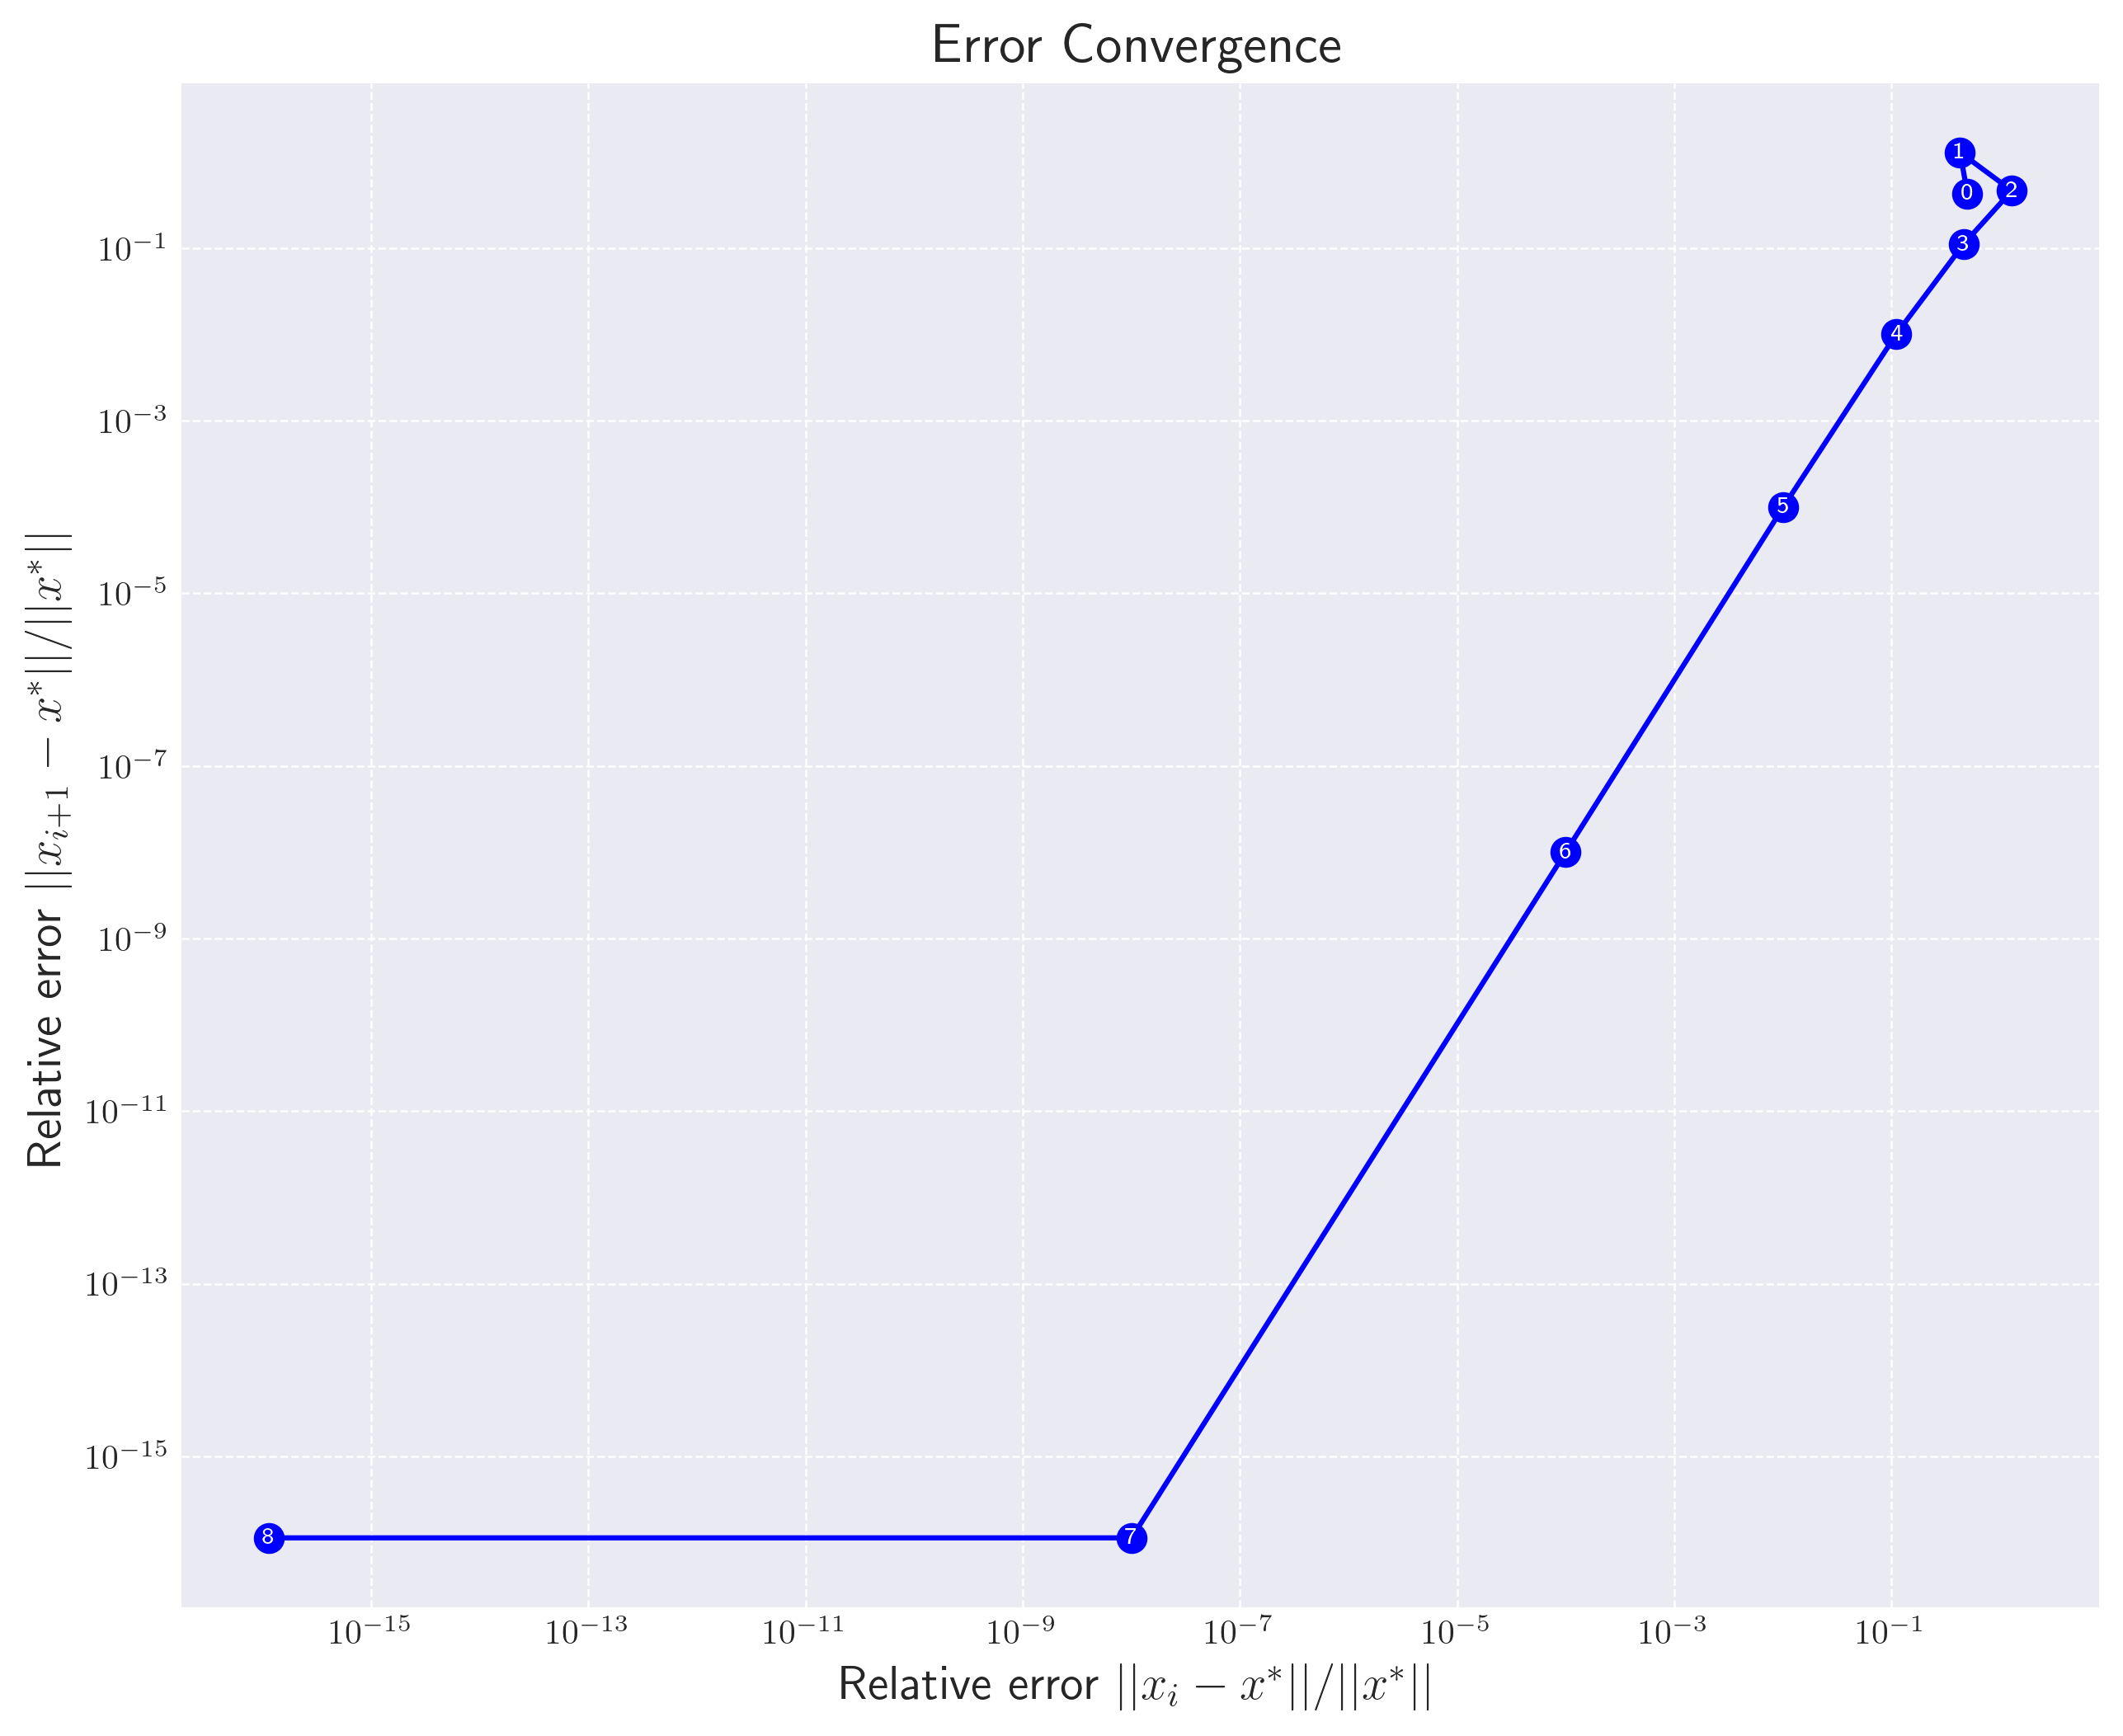

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Configure matplotlib to use LaTeX for text rendering and set the plot style
plt.rcParams["text.usetex"] = True
plt.style.use('seaborn-v0_8-dark') 

# Set the parameters for the system of equations
alpha = 100
beta = 4
gamma = 20
delta = 0.01
tolx = 1e-10

# Define the function f(x) representing the system of equations
f = lambda x: np.array([alpha*x[0] - beta *x[0]*x[1],
                        -gamma*x[1] + delta*x[0]*x[1]])

# Define the Jacobian matrix of the function f(x)
J = lambda x: np.array([[alpha-beta*x[1], -beta*x[0]],
                        [delta*x[1], -gamma+delta*x[0]]])

# Calculate the exact solution of the system of equations
x_exact = np.array([gamma/delta, alpha/beta])
# Define an initial guess for the solution
x = np.array([1000, 100])

# Create a list to store the history of the guesses
history = [x]

# Loop until the difference between consecutive guesses is less than the tolerance
while True:
    # Update the guess using Newton's method
    x_new = x - np.linalg.solve(J(x), f(x))
    # Append the new guess to the history
    history.append(x_new)
    # Check if the difference between the new and old guess is less than the tolerance
    if np.linalg.norm(x_new - x) < tolx:
        break
    # Update the old guess to the new guess
    x = x_new

# Convert the history list to a numpy array
history = np.array(history)

# Get the final solution from the history
sol = history[-1]
print(f"Solution: {sol}")
# Calculate the value of the function at the solution (this should be [0, 0])
f_sol = f(sol)
print(f"Function value at solution: {f_sol}")

# Calculate the relative error between the previous guess and the exact solution
e_prev = np.linalg.norm((history[:-1] - x_exact) / np.linalg.norm(x_exact), axis=1)
# Calculate the relative error between the next guess and the exact solution
e_next = np.linalg.norm((history[1:] - x_exact) / np.linalg.norm(x_exact), axis=1)

# Create a high-definition figure
plt.figure(figsize=(10, 8), dpi=300)

# Plot the relative errors with increased marker size
plt.plot(e_prev, e_next, 'bo-', markersize=8)

# Annotate each point with its iteration number
for i, (x_i, y_i) in enumerate(zip(e_prev, e_next), start=0):
    plt.annotate(i, (x_i, y_i), textcoords="offset points", xytext=(0, 0), ha='center', va='center', color='white', fontsize=7)

# Set the x and y axes to log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and a title to the plot with increased font sizes
plt.xlabel(r'Relative error $||x_i-x^*||/||x^*||$', fontsize=14)
plt.ylabel(r'Relative error $||x_{i+1}-x^*||/||x^*||$', fontsize=14)
plt.title('Error Convergence', fontsize=16)

# Add a grid to the plot
plt.grid(True, which="both", linestyle='--', linewidth=0.6)

# Display the plot
plt.show()
